Train a tf-idf + Ridge regression model on Newsgroups _without_ preprocessing, as a tightly controlled baseline.

In [6]:
import sys

sys.path.append("..")

from captoken import newsgroups

In [ ]:
from sklearn import metrics
from sklearn.linear_model import RidgeClassifier
from sklearn.feature_extraction import text
import sentencepiece as spm

# Directly break into pieces with tokenizer, no preprocessing required.
s = spm.SentencePieceProcessor(model_file="basetoken.spm")


def analyzer(text):
    return s.encode_as_pieces(text)

In [7]:
(xs, ys), (xs_test, ys_test), target_names = newsgroups.get_newsgroups(min_chars=100)

In [ ]:
# Train tf-idf + RidgeRegression.

# Use tokenizer to break words (the `analyzer` argument).
vectorizer = text.TfidfVectorizer(analyzer=analyzer)
vectors = vectorizer.fit_transform(xs)
clf = RidgeClassifier(tol=1e-2, solver="sparse_cg")
clf.fit(vectors, ys)

# Get F1 score on the test set.
vectors_test = vectorizer.transform(xs_test)
pred = clf.predict(vectors_test)
metrics.f1_score(ys_test, pred, average="macro")

0.7437257004539862

top 5 keywords per class:
  alt.atheism comp.graphics sci.space talk.religion.misc
0    ▁atheist     ▁graphics    ▁space         ▁Christian
1           \         ▁file    ▁Space               ▁God
2         ism      ▁Graphic    ▁orbit        ▁Christians
3        ▁god             x     ▁NASA               ▁FBI
4      ▁Islam             D   ▁launch                 th


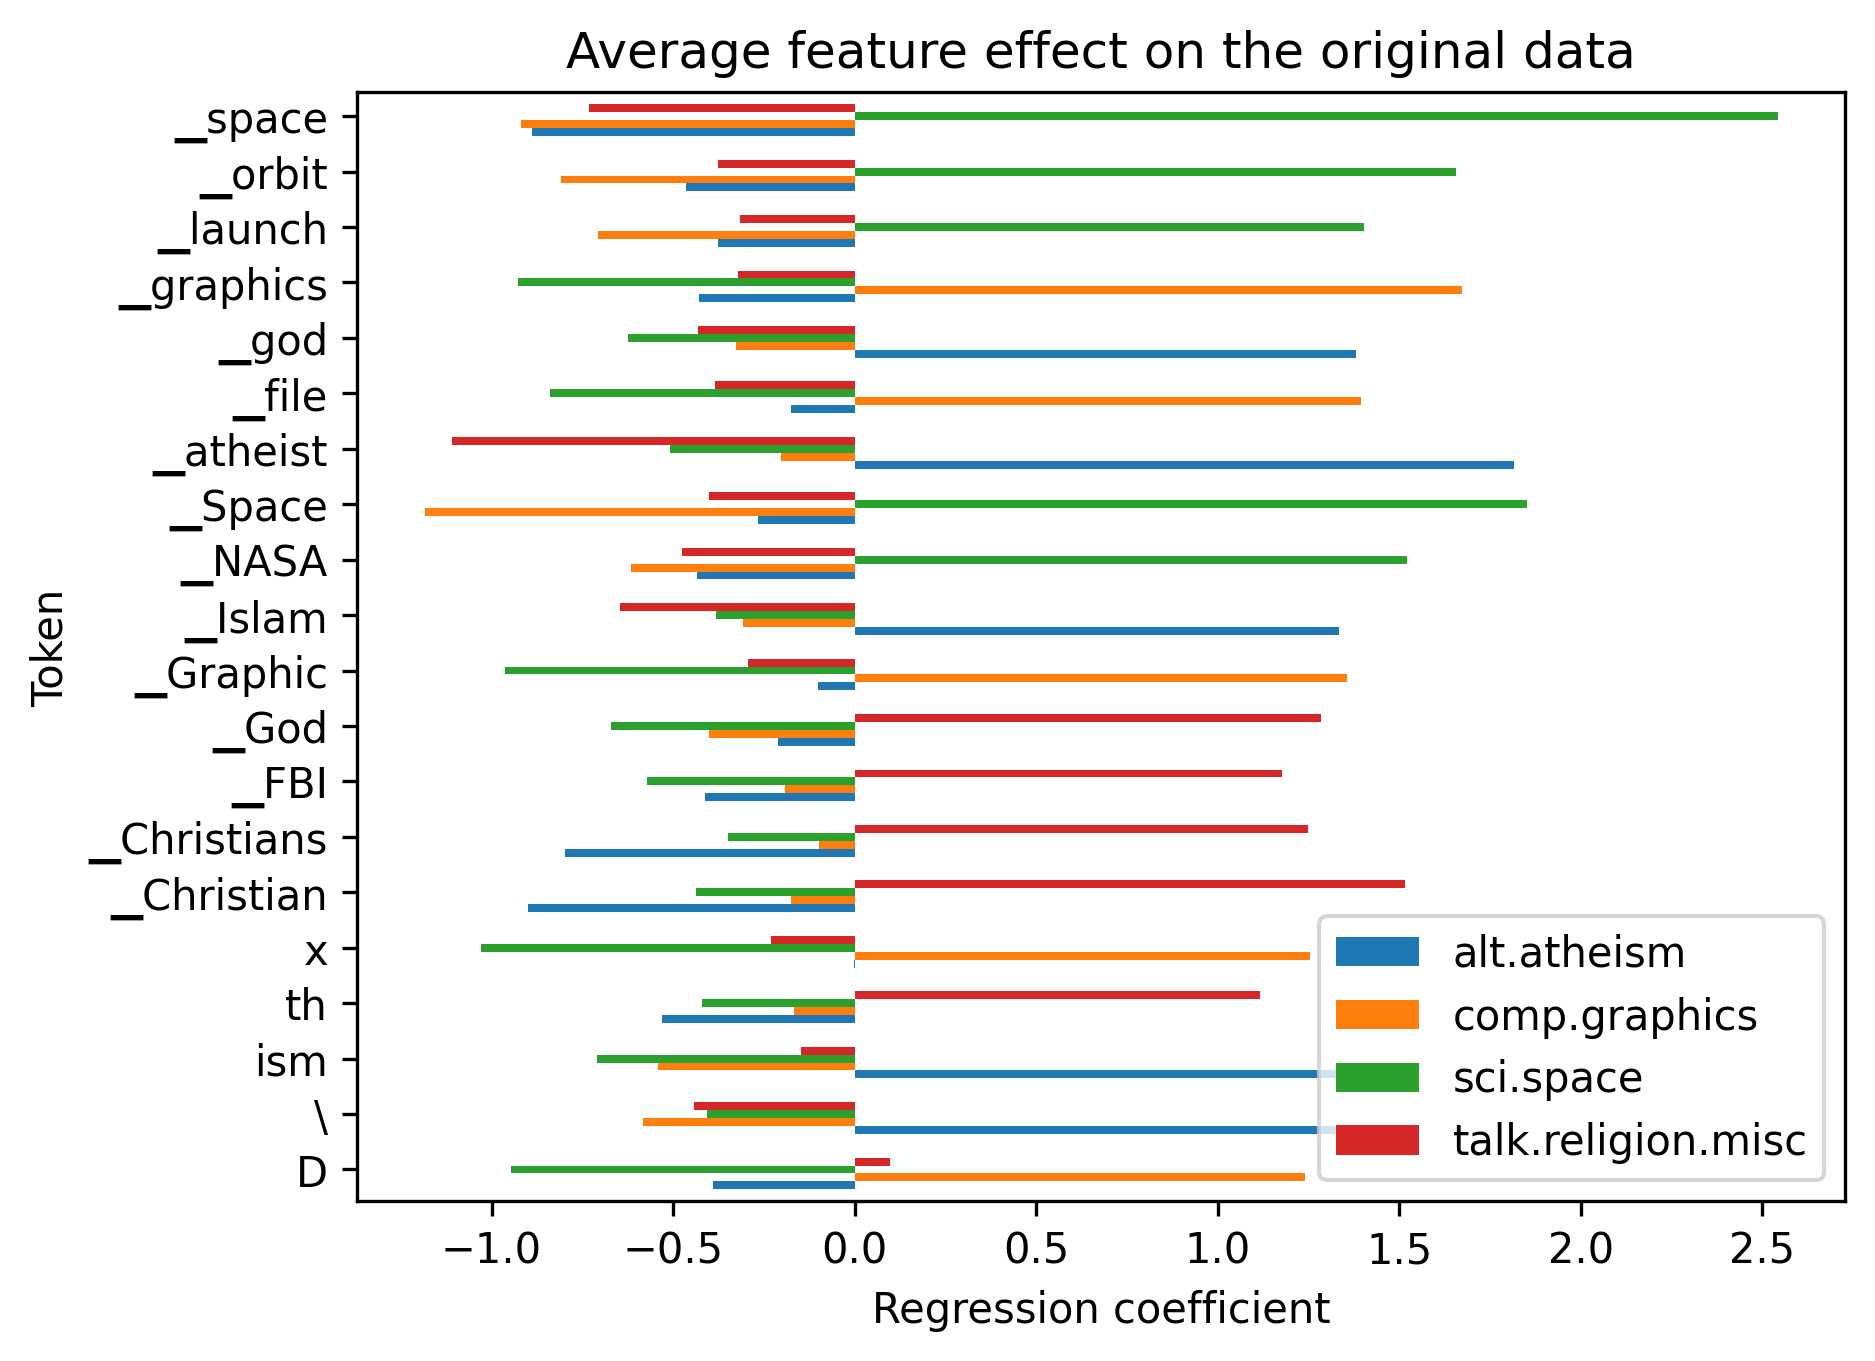

In [ ]:
import matplotlib.pyplot as plt

feature_names = vectorizer.get_feature_names_out()

# Modifying code from https://scikit-learn.org/stable/auto_examples/text/plot_document_classification_20newsgroups.html
_ = newsgroups.plot_feature_effects(clf, feature_names, target_names).set_title(
    "Average feature effect on the original data"
)

plt.savefig("coeffs.png", bbox_inches="tight", pad_inches=0, dpi=300)

## Pathologies

In [ ]:
vocab = set(s.id_to_piece(list(range(2**14))))
spaced, spaced_cap, unspaced_cap = newsgroups.calculate_duplicates(vocab)

In [ ]:
len(spaced), len(spaced_cap), len(unspaced_cap),

(680, 1000, 247, 1927)

In [ ]:
summed = len(spaced) + len(spaced_cap) + len(unspaced_cap)
summed, summed / 2**14

(1927, 0.11761474609375)